In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#  Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
#  Data Cleaning
# Check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())
print("Missing values in Products:\n", products.isnull().sum())
print("Missing values in Transactions:\n", transactions.isnull().sum())

Missing values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
# Handle missing values
customers.dropna(inplace=True)
products.dropna(inplace=True)
transactions.dropna(inplace=True)

In [7]:
#  Merge datasets
# Merge Transactions with Customers and Products
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [8]:
#  Perform EDA
# Summary statistics
print("Summary Statistics:\n", merged_data.describe())

Summary Statistics:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


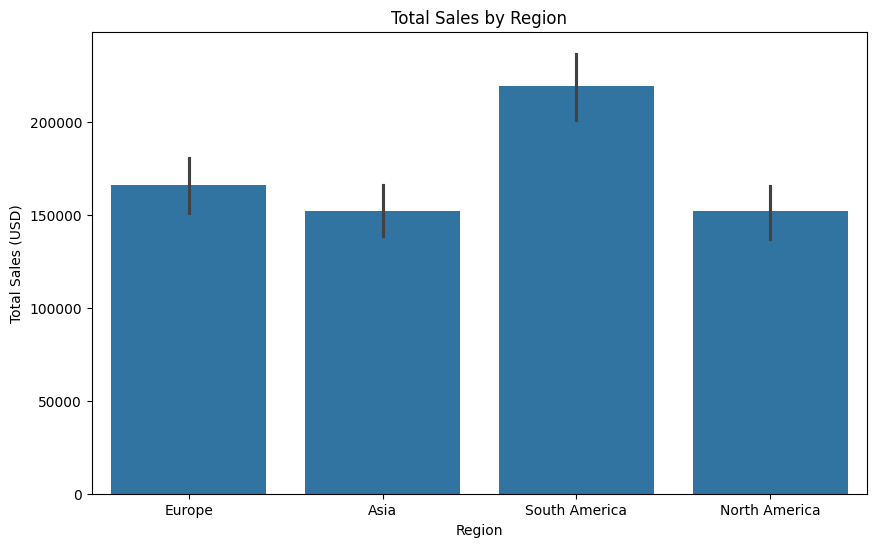

In [9]:
# Visualizations
#  Total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=merged_data, estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

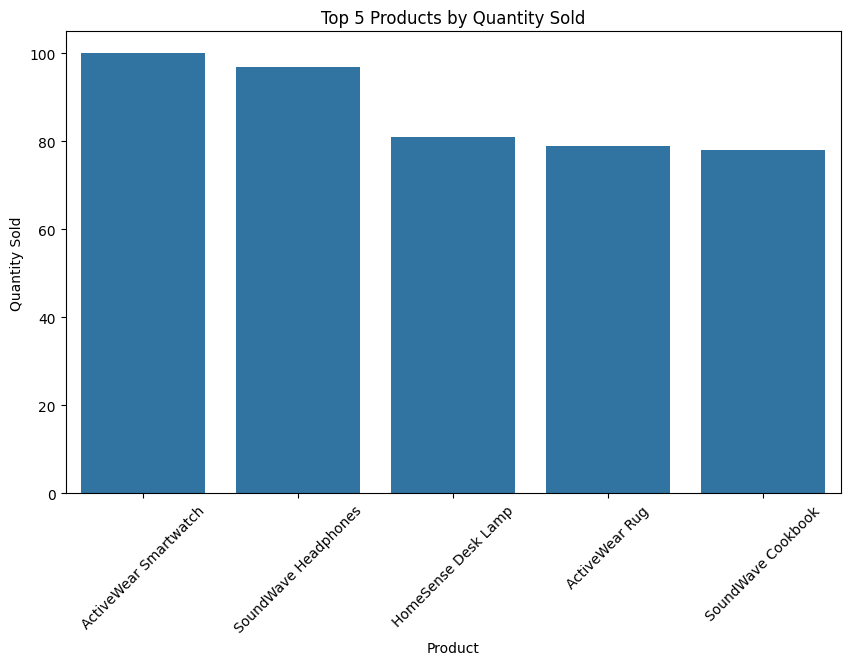

In [10]:
#  Top 5 products by quantity sold
top_products = merged_data.groupby('ProductName')['Quantity'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

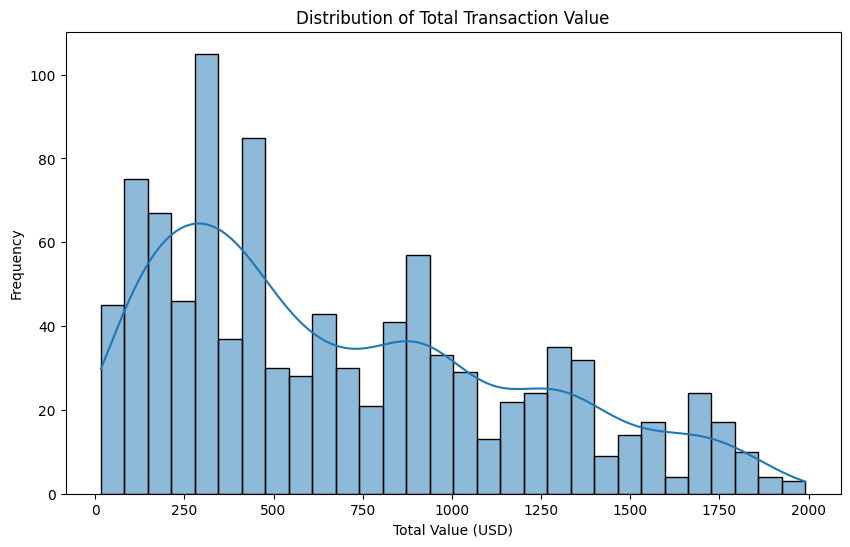

In [13]:
# Distribution of TotalValue
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['TotalValue'], bins=30, kde=True)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

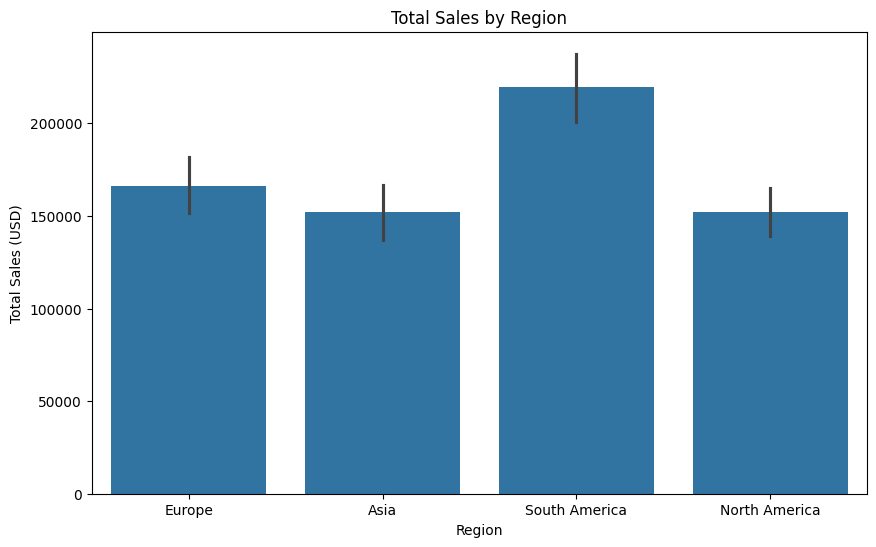

In [14]:
# Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=merged_data, estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

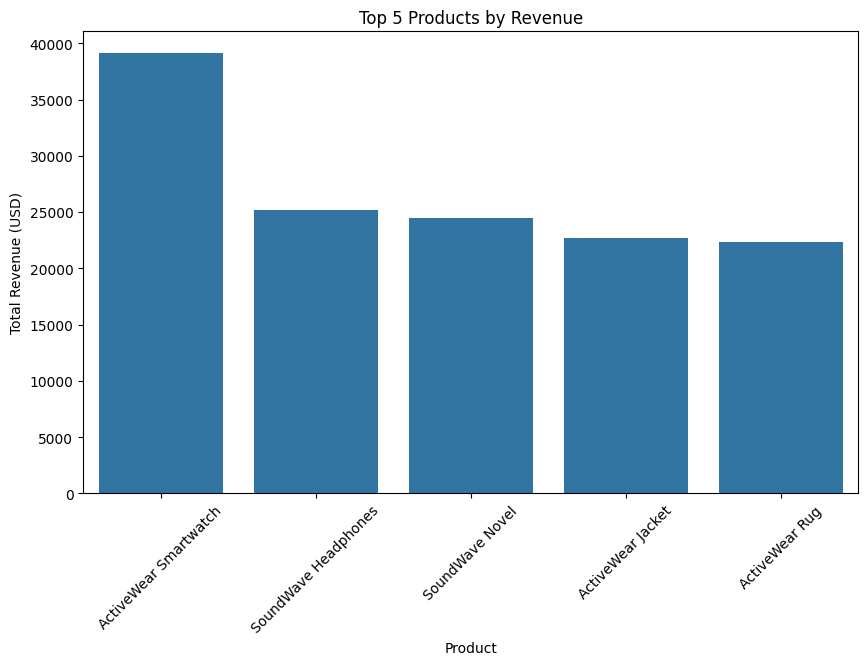

In [15]:
# Top 5 Products by Revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()